In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available and being used.")
else:
    device = torch.device("cpu")
    print("GPU not available, using CPU instead.")

GPU not available, using CPU instead.


In [3]:
# Load MNIST dataset
# Transform: first, convert image data to PyTorch tensors.
# Then, normalize the pixel values of the images. Substract the mean (0.5) from
# each pixel and divide by the standard deviation (0.5).
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# Download the dataset to the './data' directory if not already present
# The dataset is already split, we can specify to retrieve the training or the
# testing dataset.
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 39.1MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.22MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 9.32MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.63MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [20]:
# Print the number of images in the training set
len(train_dataset)

60000

In [21]:
# Print the number of images in the testing set
len(test_dataset)

10000

In [22]:
# Print the target class (number) of the image #2 in the training set
train_dataset[2][1]

4

In [23]:
# Print the shape of the image #2 in the training set
train_dataset[2][0].shape

torch.Size([1, 28, 28])

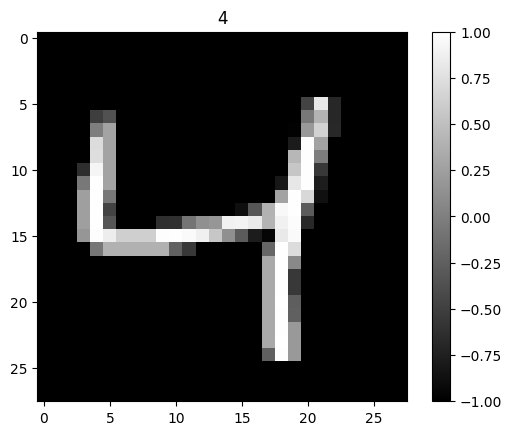

In [24]:
# Visualize an example image
image_index = 2
example_data, example_target = train_dataset[image_index]
plt.imshow(example_data[0], cmap='gray')
plt.title(example_target)
plt.colorbar()
plt.show()

In [4]:
# Train data will be randomly shuffled before each epoch (= a full pass through the dataset)
# Helps prevent model from learning patterns specific to the order of data.
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
# Test data is not shuffled to achieve consistent evaluation across different runs.
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [6]:
# Define the neural network model using Sequential
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(64, 10)
)

In [7]:
# Move model to GPU if available
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.2, inplace=False)
  (7): Linear(in_features=64, out_features=10, bias=True)
)

In [8]:
from torchsummary import summary
summary(model, (1, 28*28), device=device.type)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
              ReLU-3                  [-1, 128]               0
           Dropout-4                  [-1, 128]               0
            Linear-5                   [-1, 64]           8,256
              ReLU-6                   [-1, 64]               0
           Dropout-7                   [-1, 64]               0
            Linear-8                   [-1, 10]             650
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.42
Estimated Total Size (MB): 0.43
----------------------------------------------------------------


In [9]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
# Train the model (simple version without accuracy)
num_epochs = 20
train_loss_history = []
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        optimizer.zero_grad()
        y_pred = model(batch_X)
        loss = criterion(y_pred, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    train_loss_history.append(avg_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

Epoch [1/20], Loss: 0.4839
Epoch [2/20], Loss: 0.2569
Epoch [3/20], Loss: 0.2045
Epoch [4/20], Loss: 0.1822
Epoch [5/20], Loss: 0.1659
Epoch [6/20], Loss: 0.1555
Epoch [7/20], Loss: 0.1449
Epoch [8/20], Loss: 0.1386
Epoch [9/20], Loss: 0.1311
Epoch [10/20], Loss: 0.1249
Epoch [11/20], Loss: 0.1246
Epoch [12/20], Loss: 0.1247
Epoch [13/20], Loss: 0.1116
Epoch [14/20], Loss: 0.1122
Epoch [15/20], Loss: 0.1136
Epoch [16/20], Loss: 0.1079
Epoch [17/20], Loss: 0.1021
Epoch [18/20], Loss: 0.1041
Epoch [19/20], Loss: 0.1008
Epoch [20/20], Loss: 0.0992


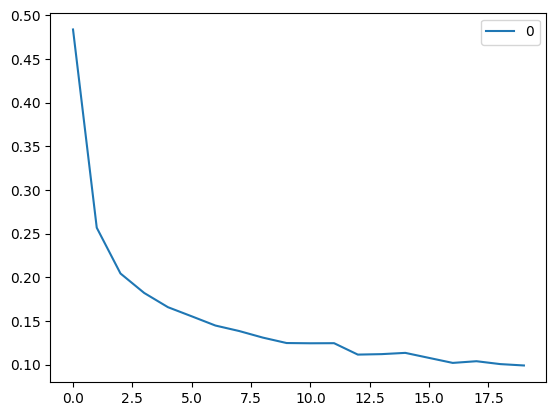

In [11]:
# Plot training loss history
pd.DataFrame(train_loss_history).plot()
plt.show()

In [12]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        y_pred = model(batch_X)
        y_pred_class = torch.argmax(y_pred.data, dim=1)
        correct += (y_pred_class == batch_y).sum().item()
        total += batch_y.size(0)

print(f'Test Accuracy: {100 * correct / total:.2f}%')

Test Accuracy: 97.51%


In [13]:
# Predict on a few test images
example_data, example_targets = next(iter(test_loader))
y_pred = model(example_data[3:7].to(device))
y_pred_class = torch.argmax(y_pred, dim=1)
print(f"True labels: {example_targets[3:7]}")
print(f"Predicted:   {y_pred_class}")

True labels: tensor([0, 4, 1, 4])
Predicted:   tensor([0, 4, 1, 4])


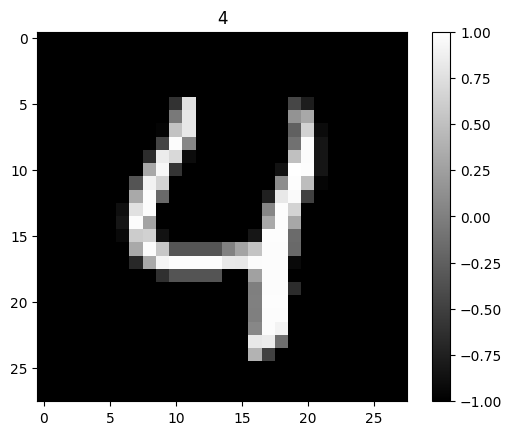

In [14]:
# Visualize a test image
image_index = 4 # Before: [3:7], here taking [5]
plt.imshow(example_data[image_index][0], cmap='gray')
plt.title(example_targets[image_index].item())
plt.colorbar()
plt.show()

# Training loop with accuracy

The following extended training loop calculates the accuracy on the training and on the test set while training the model. Use this for visualizing how these three measures behave and how this can indicate overfitting if training for too long.

**Note:** don't just execute the code below in the flow of the notebook, as it would continue training an already existing model.

**Note:** if you experiment more with training parameters and stop conditions, it would be good practice to calculate accuracy during training with a validation set and then calculate the overall accuracy with a separate test set.

In [10]:
# Train the model
num_epochs = 20
history = {'loss': [], 'train accuracy': [], 'test accuracy': []}
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for batch_X, batch_y in train_loader:
        # Move data to GPU if available
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        optimizer.zero_grad()
        y_pred = model(batch_X)
        loss = criterion(y_pred, batch_y)
        loss.backward()
        optimizer.step()

        # Estimate accuracy on the train set
        total_loss += loss.item()
        y_pred_class = torch.argmax(y_pred.data, dim=1)
        correct_train += (y_pred_class == batch_y).sum().item()
        total_train += batch_y.size(0)

    epoch_loss = total_loss / len(train_loader)
    epoch_accuracy = correct_train / total_train
    history['loss'].append(epoch_loss)
    history['train accuracy'].append(epoch_accuracy)

    # Evaluate accuracy on test set
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            y_pred = model(batch_X)
            y_pred_class = torch.argmax(y_pred.data, dim=1)
            correct_test += (y_pred_class == batch_y).sum().item()
            total_test += batch_y.size(0)
    test_accuracy = correct_test / total_test
    history['test accuracy'].append(test_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')


Epoch [1/20], Loss: 0.4902, Training Accuracy: 0.8480, Test Accuracy: 0.9354
Epoch [2/20], Loss: 0.2594, Training Accuracy: 0.9224, Test Accuracy: 0.9544
Epoch [3/20], Loss: 0.2145, Training Accuracy: 0.9346, Test Accuracy: 0.9585
Epoch [4/20], Loss: 0.1933, Training Accuracy: 0.9414, Test Accuracy: 0.9619
Epoch [5/20], Loss: 0.1746, Training Accuracy: 0.9466, Test Accuracy: 0.9618
Epoch [6/20], Loss: 0.1641, Training Accuracy: 0.9496, Test Accuracy: 0.9651
Epoch [7/20], Loss: 0.1569, Training Accuracy: 0.9520, Test Accuracy: 0.9684
Epoch [8/20], Loss: 0.1497, Training Accuracy: 0.9547, Test Accuracy: 0.9676
Epoch [9/20], Loss: 0.1422, Training Accuracy: 0.9569, Test Accuracy: 0.9713
Epoch [10/20], Loss: 0.1376, Training Accuracy: 0.9574, Test Accuracy: 0.9695
Epoch [11/20], Loss: 0.1373, Training Accuracy: 0.9568, Test Accuracy: 0.9728
Epoch [12/20], Loss: 0.1262, Training Accuracy: 0.9615, Test Accuracy: 0.9698
Epoch [13/20], Loss: 0.1271, Training Accuracy: 0.9611, Test Accuracy: 0.

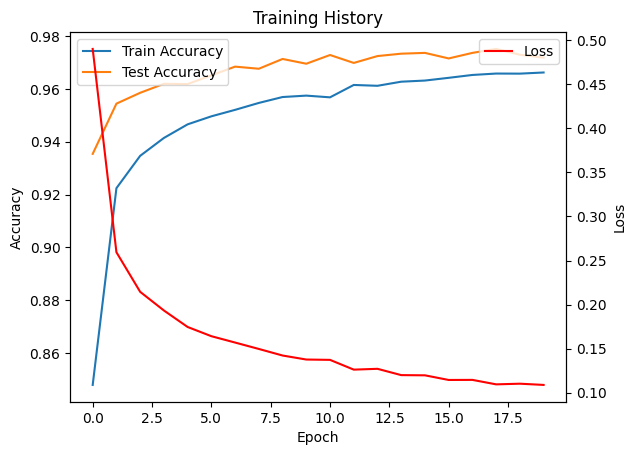

In [11]:
# Plot history
df = pd.DataFrame(history)
fig, ax1 = plt.subplots()

# Plot accuracy on the first axis
ax1.plot(df.index, df["train accuracy"], label="Train Accuracy")
ax1.plot(df.index, df["test accuracy"], label="Test Accuracy")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.legend(loc="upper left")

# Create a second axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot loss on the second axis
ax2.plot(df.index, df["loss"], label="Loss", color="red")
ax2.set_ylabel("Loss")
ax2.legend(loc="upper right")

plt.title("Training History")
plt.show()

# Weight Visualization

The following code visualizes the weights of the first layer (after flattening). You'll see that some learned to focus on different image areas.

A few layers are still coming after this, so the visualization doesn't directly hint at recognized numbers. The outputs of the first layer are later combined and ultimately lead to image recognition.

However, the first layer already builds several distinctive focus areas.

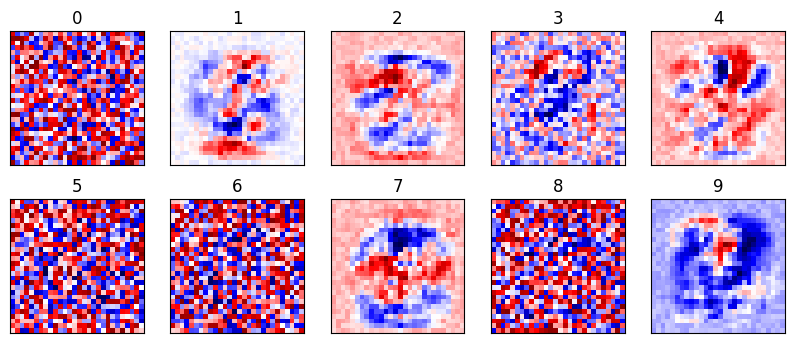

In [25]:
# Get the weights of the first linear layer
weights = model[1].weight.data.cpu().numpy()

# Create a figure and subplots
f, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.reshape(-1)

# Iterate through each subplot and visualize weights
for i in range(len(axes)):
    a = axes[i]
    # Reshape weights to 28x28 to represent the image
    a.imshow(weights[i].reshape(28, 28), cmap=plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(())
    a.set_yticks(())

plt.show()